# **다중분류 실습: Fashion MNIST 의류 분류**

<center><img src = "https://github.com/Jangrae/img/blob/master/fashion_mnist.png?raw=true" width=800/></center>

- Fashion MNIST는 28×28 픽셀 흑백 의류 이미지(10개 클래스) 데이터 셋입니다.
- 구성은 학습용 60,000장, 검증용 10,000장으로 되어 있습니다.
- MNIST보다 약간 더 어려운 이미지 분류 연습용이다.

## **1. 환경준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

### (2) 함수 만들기

In [2]:
# 함수 만들기
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Train Loss', marker='.')
    plt.plot(history['val_loss'], label='Validation Loss', marker='.')

    plt.title('Learning Curve', size=15, pad=20)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

### (3) 데이터 준비

In [3]:
# MNIST 불러오기
(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

In [4]:
# 크기 확인
print(x_train.shape)
print(y_train.shape)
print('-' * 15)
print(x_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
---------------
(10000, 28, 28)
(10000,)


## **2. 데이터 살펴보기**

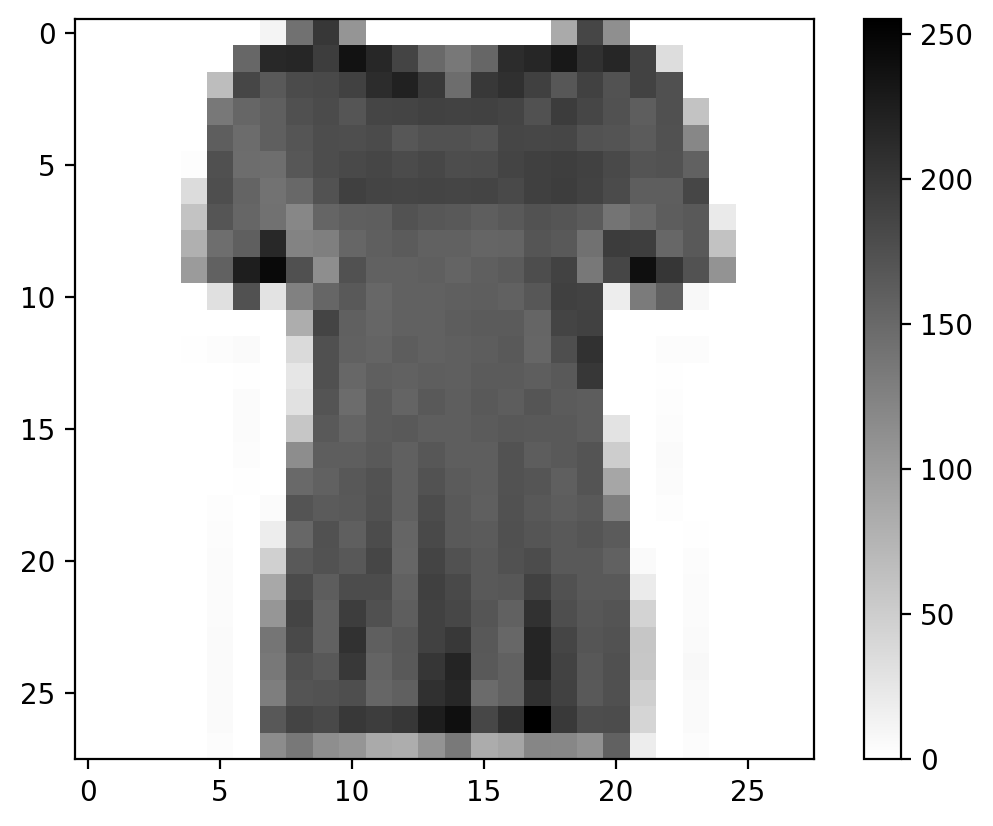

In [5]:
# 아래 숫자를 바꿔가며 확인
n = 10

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [6]:
# 값 확인
n = 10
for i in x_train[n]:
    for j in i:
        print(f'{j:3d}', end='')
    print('')

  0  0  0  0  0  0  0 11142200106  0  0  0  0  0  0  0 85185112  0  0  0  0  0  0  0
  0  0  0  0  0  0152214217194236216187149135153211217231205217188 34  0  0  0  0  0
  0  0  0  0  0 66185166180181190211221197146198206191168190172188175  0  0  0  0  0
  0  0  0  0  0135153160175180170186187190188190187174195185174161175 59  0  0  0  0
  0  0  0  0  0161147160170178177180168173174171185184185172171164174120  0  0  0  0
  0  0  0  0  2175146145168178181185180184178179187191193190181171172158  0  0  0  0
  0  0  0  0 35177155140151172191187186187186187182191194188180161161185  0  0  0  0
  0  0  0  0 59170153141120154160161172168166161165172170164139149162166 21  0  0  0
  0  0  0  0 79145160214123128153160164158157154155170165141195193152166 61  0  0  0
  0  0  0  0100157225245175113174158158160155160164178188135185240201172108  0  0  0
  0  0  0  0  0 31174 28126153166152158158160161157168191188 18132159  7  0  0  0  0
  0  0  0  0  0  0  0  0 82187159153157158162164164154187190  0  

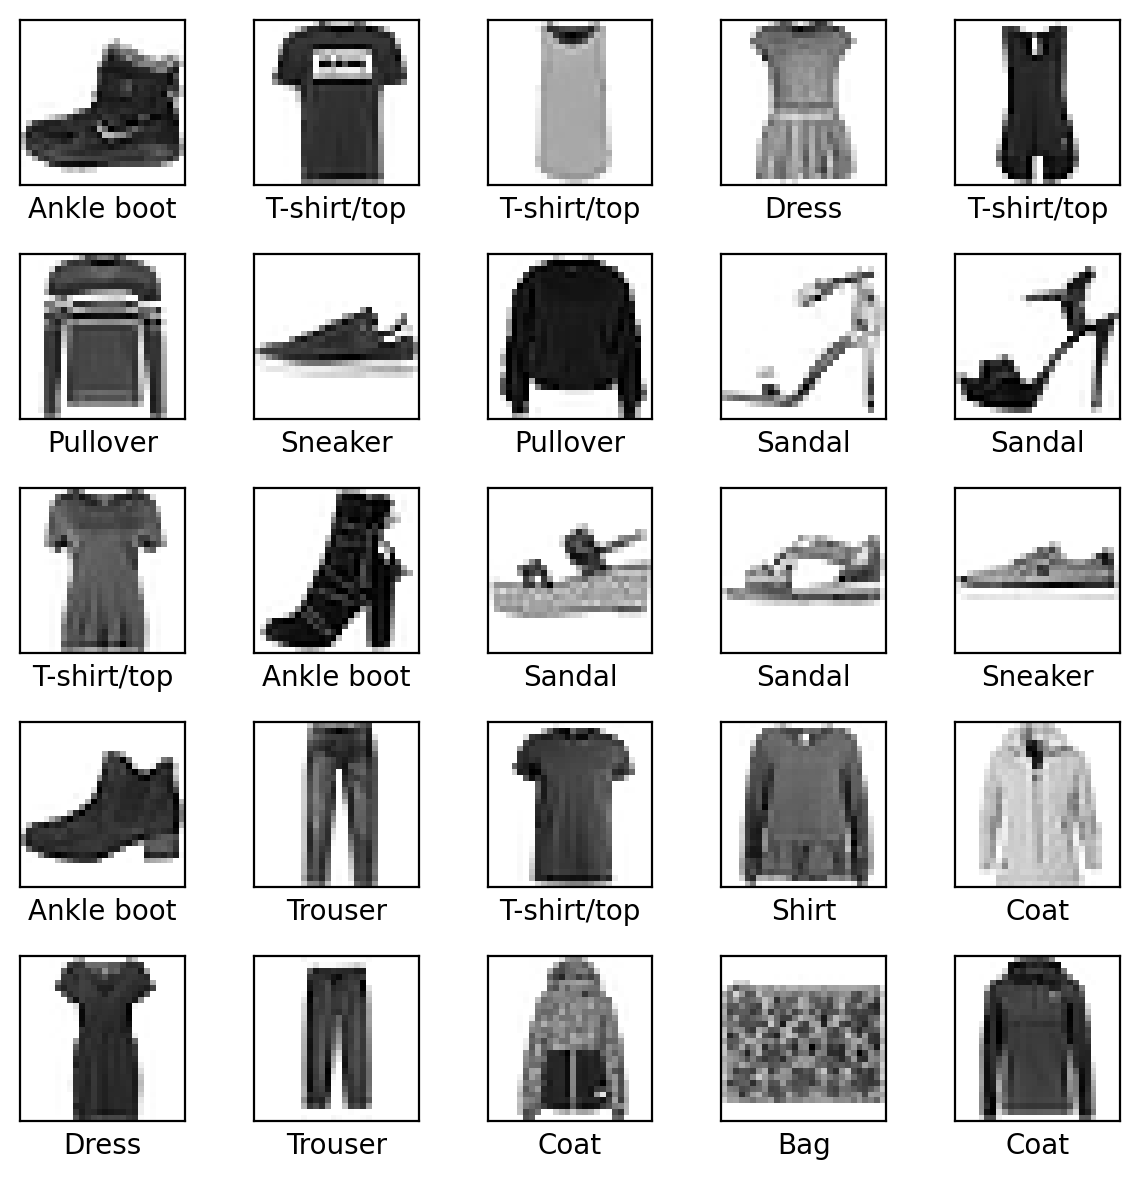

In [7]:
# 25개 확인
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## **3. 데이터 전처리**

### (1) 2차원으로 펼치기

In [8]:
# 변환 전
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
# 2차원 변환
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [10]:
# 변환 후
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### (2) 스케일링

- 0 - 255 값으로 되어 있는 데이터를 0 - 1사이 값으로 변환합니다.
- x_train, x_val을 그냥 255로 나누면 됩니다.

In [11]:
# 0 ~ 1 사이 값으로 변환
x_train = x_train / 255
x_val = x_val / 255

## **4. 모델링 1**

### (1) 모델 선언

In [12]:
nf = x_train.shape[1]

model = Sequential([
    Input(shape=(nf,)),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### (2) 모델 학습

In [13]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val)).history

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7738 - loss: 0.6793 - val_accuracy: 0.8181 - val_loss: 0.5982
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8210 - loss: 0.5931 - val_accuracy: 0.8130 - val_loss: 0.6011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8315 - loss: 0.5649 - val_accuracy: 0.8142 - val_loss: 0.6297
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8322 - loss: 0.5469 - val_accuracy: 0.8254 - val_loss: 0.6355
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8397 - loss: 0.5321 - val_accuracy: 0.8236 - val_loss: 0.6129
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8403 - loss: 0.5274 - val_accuracy: 0.8172 - val_loss: 0.6366
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8427 - loss: 0.5200 - val_accuracy: 0.8176 - val_loss: 0.6277
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8359 - loss: 0.5471 - 

### (3) 예측 및 성능 평가

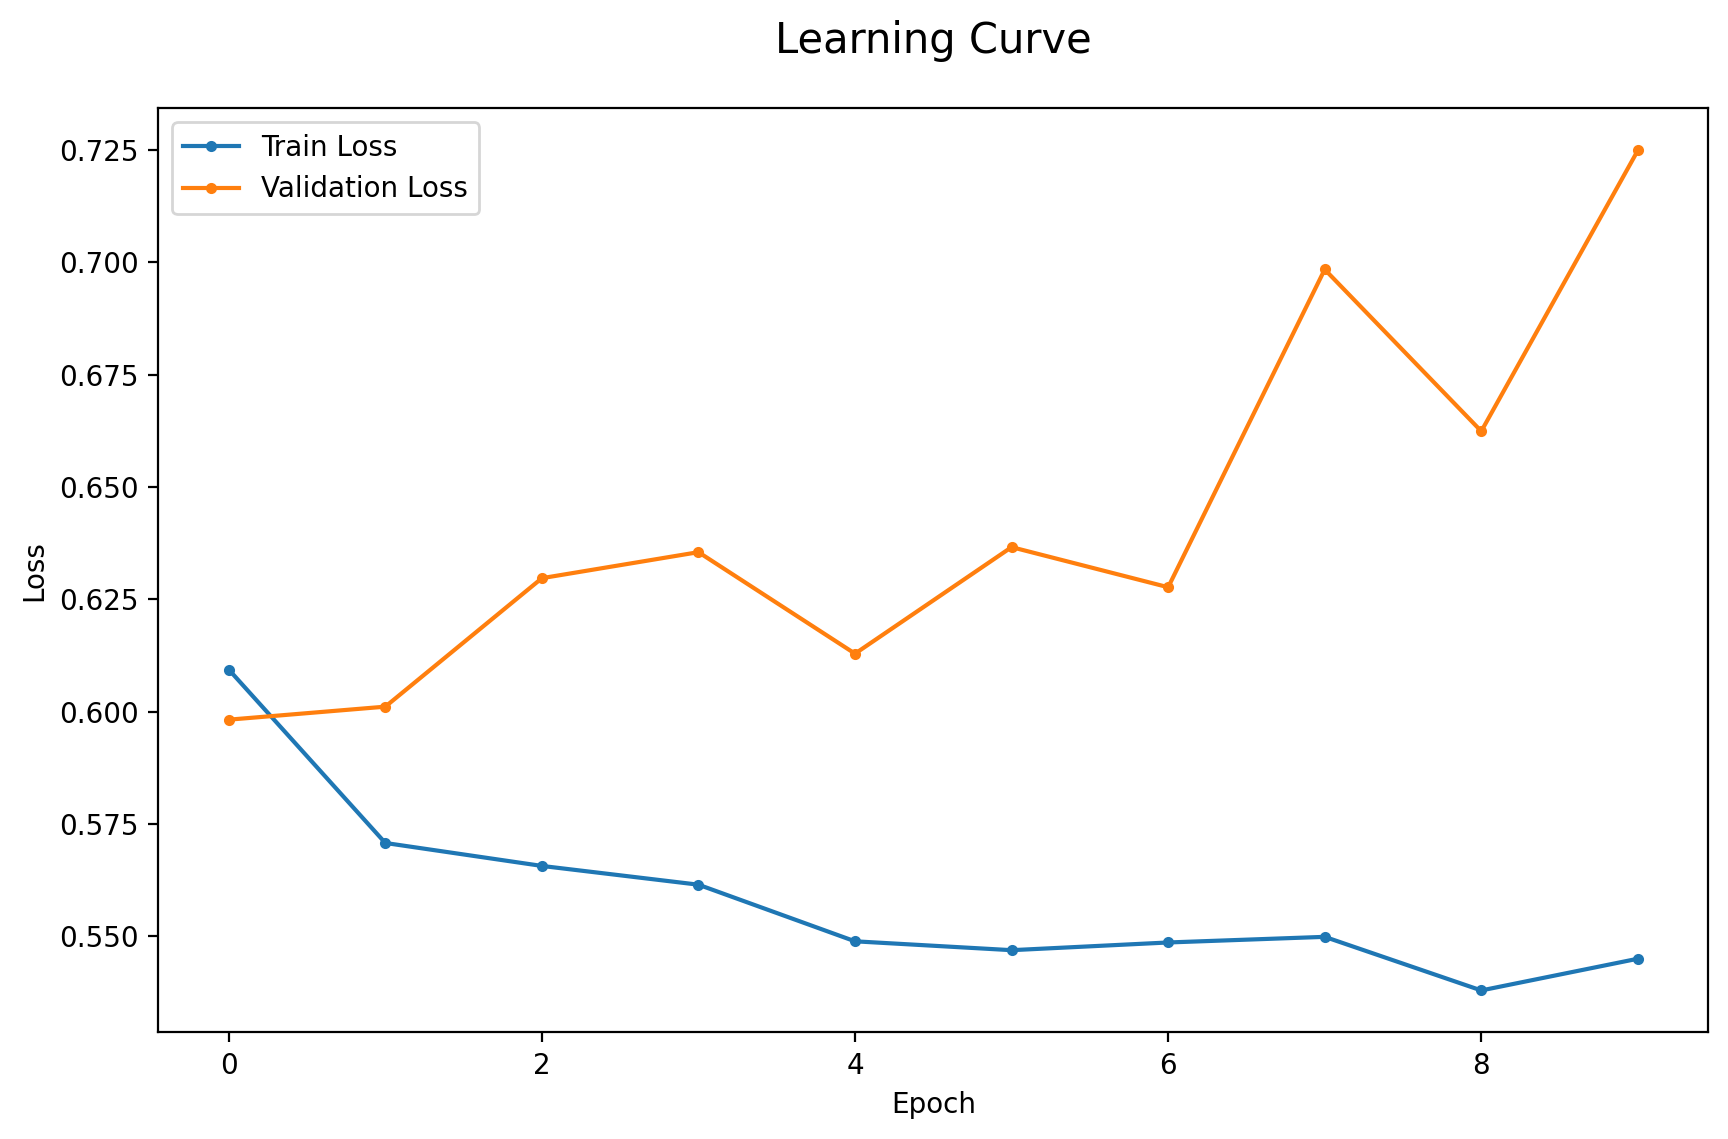

In [14]:
dl_history_plot(hist)

In [15]:
y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.8162
[[933   2   6  27   2   1   9   0  20   0]
 [ 11 952   0  30   4   0   1   0   2   0]
 [ 86   5 677  13 170   0  30   0  19   0]
 [113   7   3 840  16   0   8   0  13   0]
 [ 19   1  70  49 812   0  30   0  19   0]
 [  0   0   0   1   0 958   0  14   7  20]
 [328   1 111  36 175   0 300   0  49   0]
 [  0   0   0   0   0 161   0 800   1  38]
 [ 14   1   0   7   2   4   1   4 967   0]
 [  0   1   0   0   0  30   0  45   1 923]]
              precision    recall  f1-score   support

           0       0.62      0.93      0.75      1000
           1       0.98      0.95      0.97      1000
           2       0.78      0.68      0.73      1000
           3       0.84      0.84      0.84      1000
           4       0.69      0.81      0.74      1000
           5       0.83      0.96      0.89      1000
           6       0.79      0.30      0.44      1000
           7       0.93      0.80      0.86      1000
           8       0.88      0.97      0.92      1000
           9       0.

## **5. 모델링 2**

- Hidden Layer를 추가하여 다양한 모델을 만들고 성능을 비교해 봅니다.
- 성능에 영향을 주는 요인은
    - Hidden Layer 수
    - Node 수
    - epochs 수 (10 ~ 20 사이에서 결정)
    - learning_rate

#### 1) 모델 선언

In [17]:
nf = x_train.shape[1]

model2 = Sequential([
    Input(shape=(nf,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model2.summary()

model2.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

#### 2) 모델 학습

In [18]:
hist2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val)).history

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7611 - loss: 0.6568 - val_accuracy: 0.8233 - val_loss: 0.5021
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8408 - loss: 0.4444 - val_accuracy: 0.8394 - val_loss: 0.4517
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8542 - loss: 0.4121 - val_accuracy: 0.8451 - val_loss: 0.4458
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8534 - loss: 0.4158 - val_accuracy: 0.8522 - val_loss: 0.4388
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.3986 - val_accuracy: 0.8404 - val_loss: 0.4671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8614 - loss: 0.3882 - val_accuracy: 0.8463 - val_loss: 0.4373
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8661 - loss: 0.3750 - val_accuracy: 0.8497 - val_loss: 0.4528
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8691 - loss: 0.3724 - 

#### 3) 예측 및 성능 평가

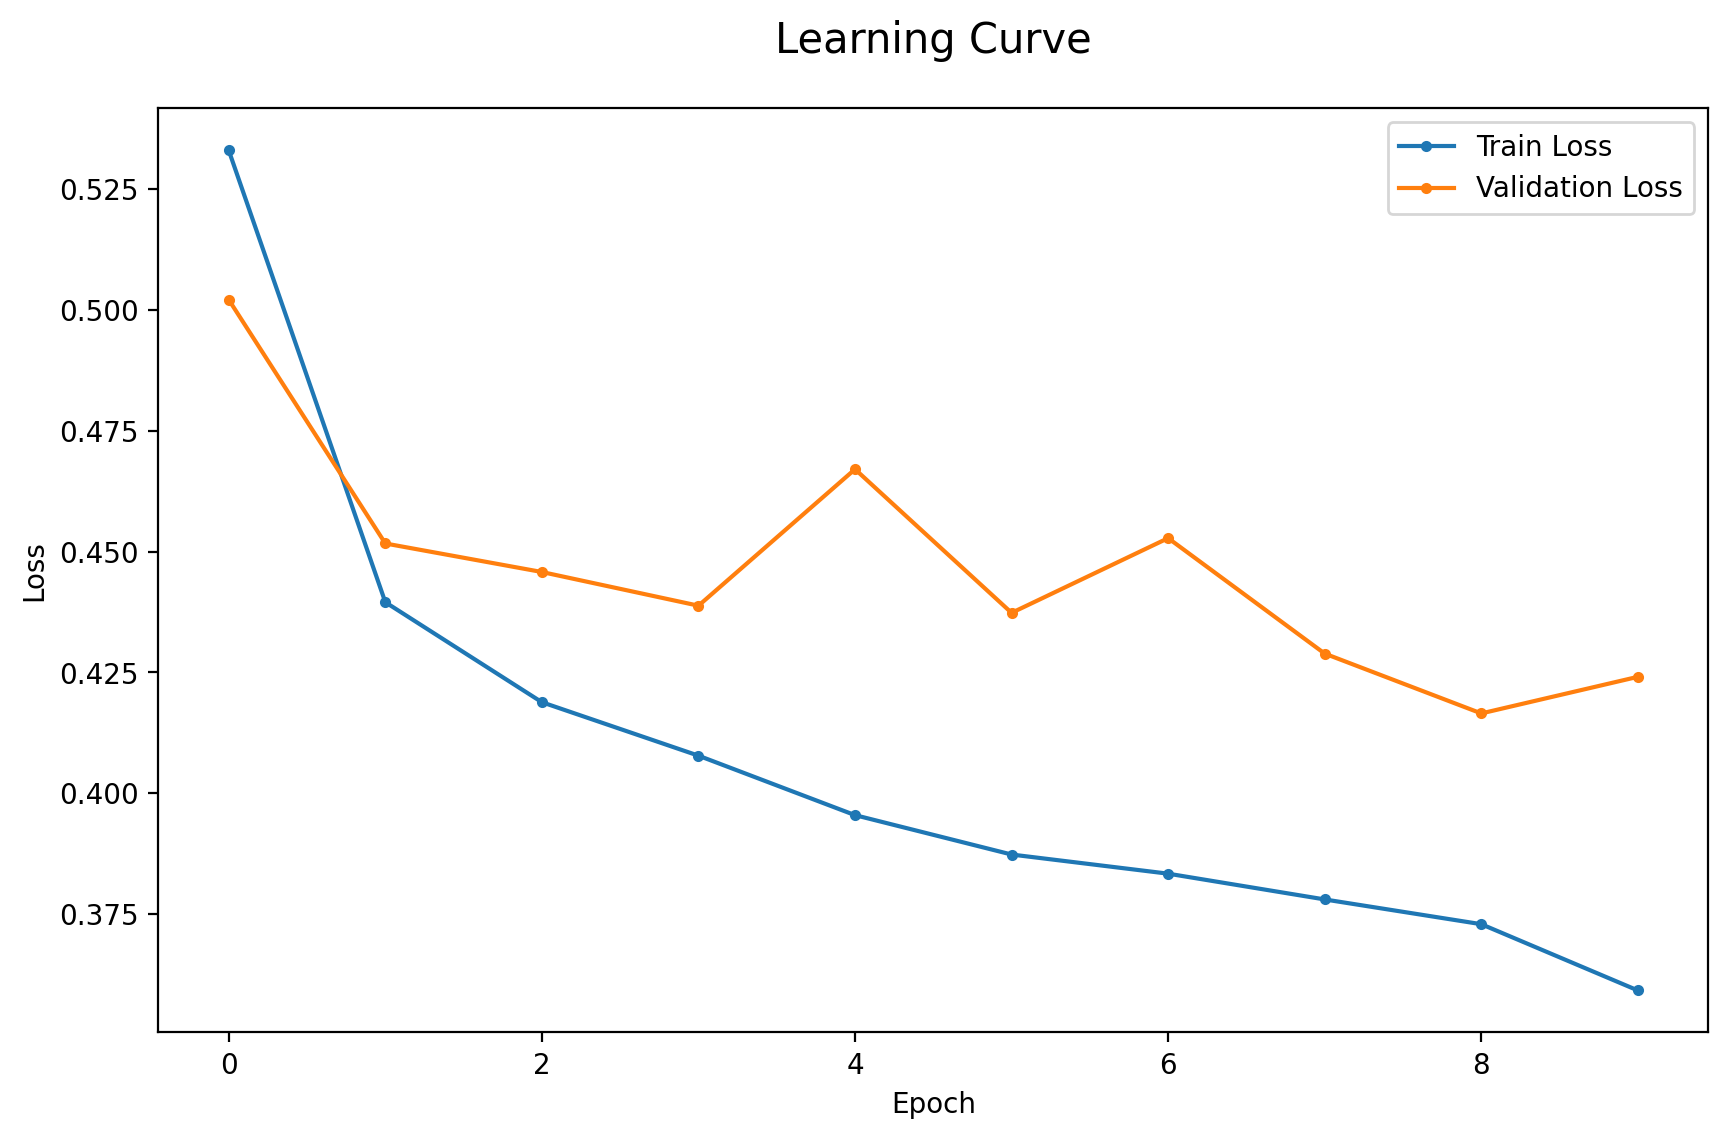

In [19]:
dl_history_plot(hist2)

In [20]:
y_pred2 = model.predict(x_val)
y_pred2 = np.argmax(y_pred2, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
print(accuracy_score(y_val, y_pred2))
print(confusion_matrix(y_val, y_pred2))
print(classification_report(y_val, y_pred2))

0.8162
[[933   2   6  27   2   1   9   0  20   0]
 [ 11 952   0  30   4   0   1   0   2   0]
 [ 86   5 677  13 170   0  30   0  19   0]
 [113   7   3 840  16   0   8   0  13   0]
 [ 19   1  70  49 812   0  30   0  19   0]
 [  0   0   0   1   0 958   0  14   7  20]
 [328   1 111  36 175   0 300   0  49   0]
 [  0   0   0   0   0 161   0 800   1  38]
 [ 14   1   0   7   2   4   1   4 967   0]
 [  0   1   0   0   0  30   0  45   1 923]]
              precision    recall  f1-score   support

           0       0.62      0.93      0.75      1000
           1       0.98      0.95      0.97      1000
           2       0.78      0.68      0.73      1000
           3       0.84      0.84      0.84      1000
           4       0.69      0.81      0.74      1000
           5       0.83      0.96      0.89      1000
           6       0.79      0.30      0.44      1000
           7       0.93      0.80      0.86      1000
           8       0.88      0.97      0.92      1000
           9       0.